In [ ]:
from main import *
from visualization import *
from stats import *

from scipy.stats import spearmanr

%matplotlib inline
plt.rcParams['font.size'] = 6

# Loading required data to make Figure 2

In [ ]:
top_directory = '/media/anleg84/One Touch/Data/Main/'
atlas_path = '/home/anleg84/Documents/Atlas/MapzebrainOld/'
excluded = [10, 34, 44, 49, 69]
atlas = MapzebrainAtlas(atlas_path)
SC_directed = np.load('Data/directed_terminals_expanded.npy')
SC_undirected = np.load('Data/undirected_terminals_expanded.npy')
acronyms = list(np.delete(atlas.acronyms, excluded))

FC = np.load('Results/FC_matrix.npy')
SC = delete_rows_and_columns(SC_undirected, excluded)
SC_dir = delete_rows_and_columns(SC_directed, excluded)
triangle = np.triu_indices(FC.shape[0], 1)
empirical_correlation = pearsonr(FC[triangle], SC[triangle])[0]

region_centroids = np.concatenate([atlas.regionCentroids['left'], atlas.regionCentroids['right']], axis=0)
region_centroids[:, 1] = 974 - region_centroids[:, 1]
region_centroids = np.delete(region_centroids, np.concatenate([excluded, np.array(excluded) + 70]), axis=0)

corrs_0 = np.load('Results/figure2_directionality_corrs0.npy')
corrs_1 = np.load('Results/figure2_directionality_corrs1.npy')
corrs_2 = np.load('Results/figure2_directionality_corrs2.npy')
number_of_connections = np.load('Results/number_of_connections.npy')

centroids_left = np.delete(atlas.regionCentroids['left'], excluded, axis=0)
centroids_right = np.delete(atlas.regionCentroids['right'], excluded, axis=0)
deg_wei_SC = np.load('Results/figure2_degree_SC.npy')
deg_wei_FC = np.load('Results/figure2_degree_FC.npy')

expvar = np.load('Results/figure2_PCA_expvar.npy')
sPC1 = np.load('Results/figure2_sPC1.npy')

Rsquared_single = np.load('Results/figure2_rsquared_single.npy')
Rsquared_baseline = np.load('Results/figure2_rsquared_baseline.npy')
predictors_names = np.load('Results/figure2_predictors_names.npy')

euc = normalize(np.load('Results/figure2_predictor_euc.npy'))
pl = normalize(np.load('Results/figure2_predictor_pl.npy'))
comm = normalize(np.load('Results/figure2_predictor_comm.npy'))
cs = normalize(np.load('Results/figure2_predictor_cs.npy'))

null_corrs_SCCM = np.load('Results/null_predictor_correlations_SCCM.npy')
null_PC1_SCCM = np.load('Results/null_PC1_correlations_SCCM.npy')

null_corrs_CM = np.load('Results/null_predictor_correlations_CM.npy')
null_PC1_CM = np.load('Results/null_PC1_correlations_CM.npy')
empirical_corr_PC1 = pearsonr(sPC1[triangle], FC[triangle])[0]

In [3]:
def plot_smooth_histogram(ax, data, bins, N_interp=1000, sigma=20, density=False, color='black', edgecolor='black', alpha=1, linewidth=1, orientation='vertical'):
    h1 = np.histogram(data, bins=bins, density=density)
    #plt.close()
    y1 = gaussian_filter1d(interpolate_signal(h1[0], N_interp), sigma)
    x1 = interpolate_signal(h1[1], N_interp)
    if orientation == 'vertical':
        ax.fill_between(x1, 0, y1, color=color, edgecolor='None', alpha=alpha)
        ax.plot(x1, y1, color=edgecolor, linewidth=linewidth)
    elif orientation == 'horizontal':
        ax.fill_betweenx(x1, 0, y1, color=color, edgecolor='None', alpha=alpha)
        ax.plot(y1, x1, color=edgecolor, linewidth=linewidth)

# Generating figure 2

In [4]:
color1 = [0, 0, 0]
blue = hex2rgb('#006DAA')
color3 = [1, 1, 1]
red = np.array([205, 48, 112]) / 255

colormap = make_cmap([color1, blue, color3], [0, 0.5, 1])

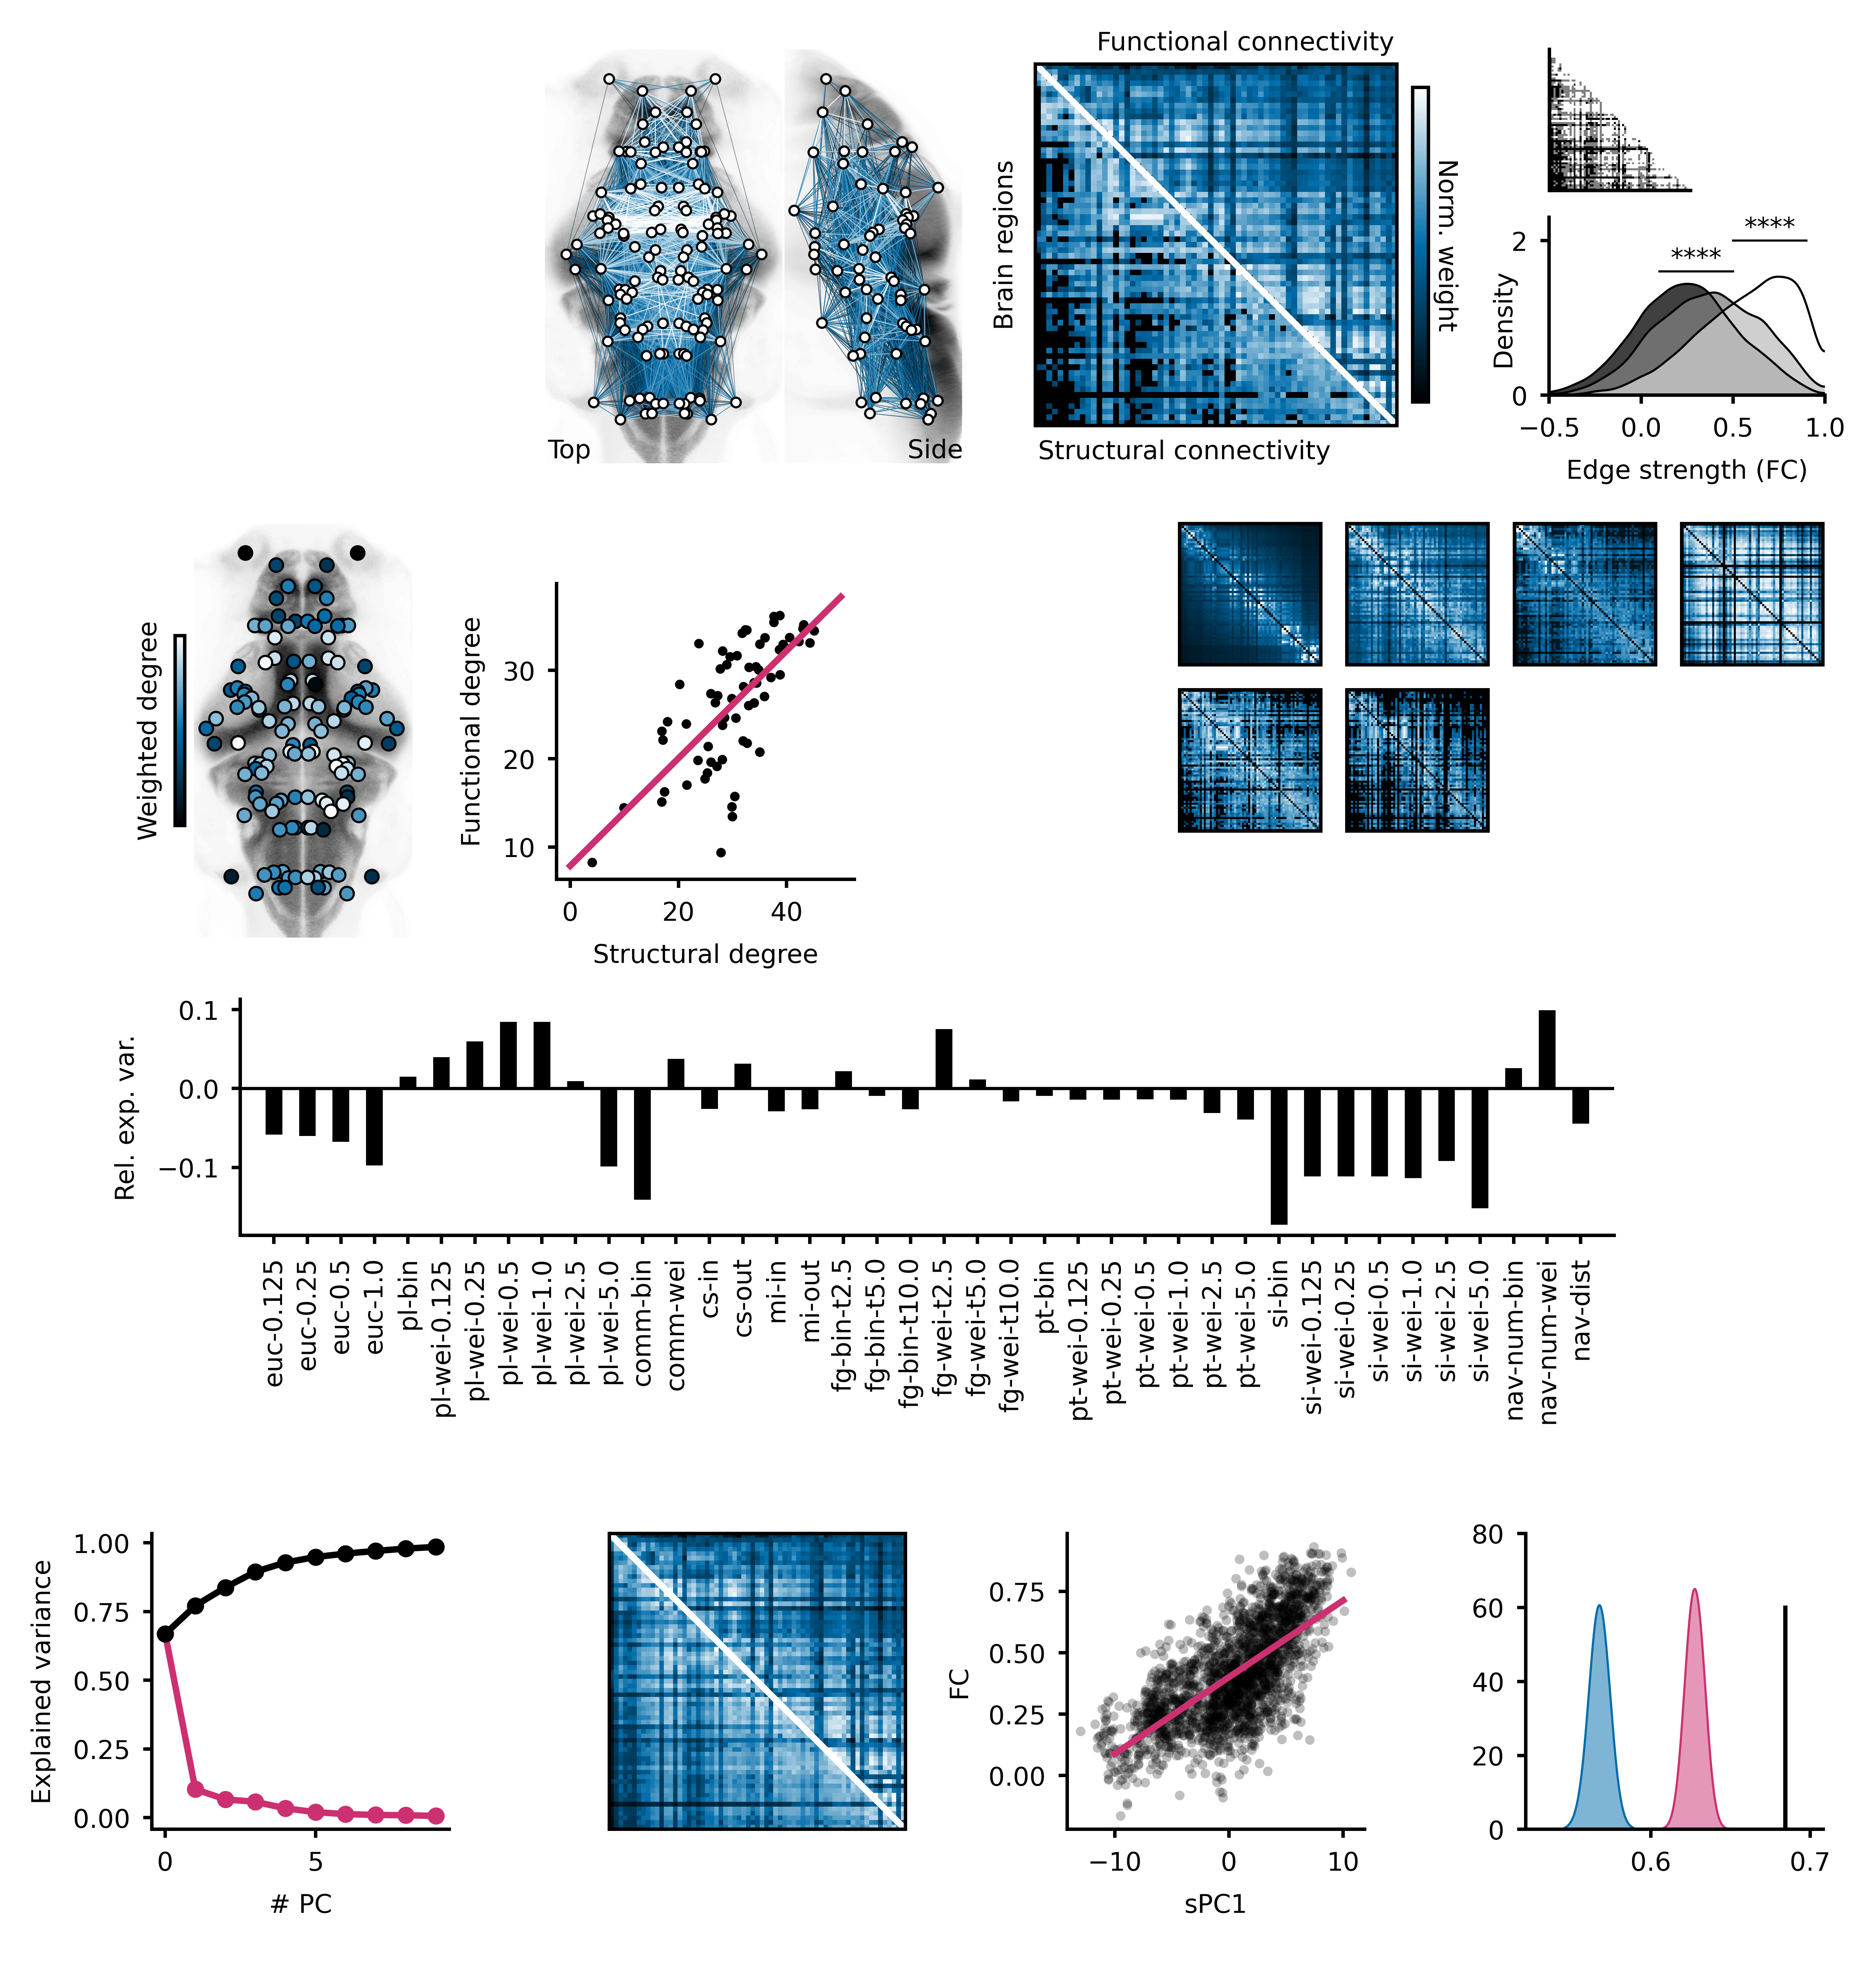

In [5]:
fig = PaperFigure(figsize=(7, 8), dpi=900)

fig.set_tick_length(2)
fig.set_font_size(6)
fig.add_background() # Useful when messing with the layout

# Layout ------------------------------------------------------------------------------------

x_b = 1.65
fig.add_axes('graph_top', (x_b, 0), 1, 1.75)
fig.add_axes('graph_side', (x_b + 1, 0), 0.75, 1.75)
fig.add_axes('comparison', (x_b + 1 + 0.75 + 0.3, 0), 1.65, 1.65)
fig.add_axes('directionality', (5.85, 0), 0.6, 0.6)
fig.add_axes('histograms', (5.85, 0.71), 1.5, 0.75)

fig.add_axes('degrees_top', (0.1, 2), 1, 1.75)
fig.add_axes('degrees_correlation', (1.70, 2.25), 1.25, 1.25)

fig.add_axes('predictor1', (4.3, 2), 0.6, 0.6)
fig.add_axes('predictor2', (4.3 + 0.6 + 0.1, 2), 0.6, 0.6)
fig.add_axes('predictor3', (4.3 + 1.2 + 0.2, 2), 0.6, 0.6)
fig.add_axes('predictor4', (4.3 + 1.8 + 0.3, 2), 0.6, 0.6)

fig.add_axes('SC_und', (4.3, 2.7), 0.6, 0.6)
fig.add_axes('SC_dir', (4.3 + 0.6 + 0.1, 2.7), 0.6, 0.6)
#fig.add_axes('PCA', (7 - 0.75, 3), 0.75, 0.75)

fig.add_axes('long_barchart', (0.375, 4.), 5.75, 1)

w = 1.25
pad = (7 - 4 * w) / 3
delta_y = 2.25
fig.add_axes('PCA', (0 * (w + pad), 4 + delta_y), w, w)
fig.add_axes('comparison_PC', (1 * (w + pad), 4 + delta_y), w, w)
fig.add_axes('correlation_PC', (2 * (w + pad), 4 + delta_y), w, w)
fig.add_axes('null_dists', (3 * (w + pad), 4 + delta_y), w, w)

# Content -----------------------------------------------------------------------------------

# b) panel (left) 
ax = fig.axes['graph_top']
bbox = ax.get_position()
x0, y1 = bbox.x0, bbox.y1
ax.imshow(atlas.XYprojection, cmap='binary', aspect='auto')
draw_graph(ax, np.tile(SC, (2, 2)), region_centroids, percentile=25, s=5, edge_cmap=colormap, alpha=1, edge_vmin=0.5, edge_vmax=0.9,
          linewidth=0.25, node_edgewidth=0.5, rasterized=True)
ax.set_xlim([65, 505])
ax.set_ylim([850, 50])
ax.text(70, 850, 'Top', ha='left', va='bottom')
ax.axis('off')

# b) panel (right)
ax = fig.axes['graph_side']
ax.imshow(np.rot90(atlas.XZprojection, k=3), cmap='binary', aspect='auto')
c = np.flip(np.delete(region_centroids, 0, axis=1), axis=1)
c[:, 0] = 359 - c[:, 0]
draw_graph(ax, np.tile(SC, (2, 2)), c, percentile=25,
           s=5, edge_cmap=colormap, alpha=0.5, edge_vmin=0.5, edge_vmax=0.9, node_edgewidth=0.5, linewidth=0.25)
ax.set_xlim([50, 359])
ax.set_ylim([850, 50])
ax.set_xticks([])
ax.set_yticks([])
ax.text(359, 850, 'Side', ha='right', va='bottom')
ax.axis('off')

# c) panel 
ax = fig.axes['comparison']
bbox = ax.get_position()
x0, y1 = bbox.x0, bbox.y1
matrix = normalize(np.copy(SC))
matrix[triangle] = normalize(np.copy(FC))[triangle]
cax = ax.imshow(matrix, cmap=colormap)
cbar = plt.colorbar(cax, ax=ax, fraction=0.04, pad=0.04)
cbar.set_ticks([])
cbar.set_label('Norm. weight', rotation=270, labelpad=7)
ax.plot([0, 64.5], [0, 64.5], color='white', linewidth=1.5)
ax.text(64, -3, 'Functional connectivity', ha='right')
ax.text(0, 67, 'Structural connectivity', ha='left', va='top')
ax.set_ylabel('Brain regions')
ax.set_xticks([])
ax.set_yticks([])
#plt.axis('off')

# d) panel (top)
ax = fig.axes['directionality']
matrix = np.copy(number_of_connections)
mask = np.triu_indices(matrix.shape[0], k=0)
masked_matrix = np.ma.array(matrix, mask=np.zeros_like(matrix))
masked_matrix[mask] = np.ma.masked
ax.imshow(masked_matrix, cmap='gray')
ax.spines[['top', 'right']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# d) panel (bottom)
ax = fig.axes['histograms']
bins = np.linspace(-1, 1, 50)
plot_smooth_histogram(ax, corrs_0, bins, sigma=20, color='black', edgecolor='black', alpha=0.75, density=True, linewidth=0.5)
plot_smooth_histogram(ax, corrs_1, bins, sigma=20, color=[0.5, 0.5, 0.5], edgecolor='black', alpha=0.75, density=True, linewidth=0.5)
plot_smooth_histogram(ax, corrs_2, bins, sigma=20, color='white', edgecolor='black', alpha=0.5, density=True, linewidth=0.5)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Edge strength (FC)')
ax.set_xlim([-0.5, 1])
ax.set_ylim([0, 2.3])
ax.plot([0.1, 0.5], [1.6, 1.6], color='black', linewidth=0.5)
ax.text(0.3, 1.6, '****', ha='center', va='bottom')
ax.plot([0.5, 0.9], [2, 2], color='black', linewidth=0.5)
ax.text(0.7, 2, '****', ha='center', va='bottom')
ax.set_yticks([0, 2])
ax.text(-0.75, 1, 'Density', ha='center', va='center', rotation=90)

# e) panel 
ax = fig.axes['degrees_top']
ax.imshow(atlas.XYprojection, cmap='binary', aspect='auto')
ax.scatter(centroids_left[:, 0] - 15, 974 - centroids_left[:, 1], s=10,
            edgecolor='black', linewidth=0.5, c=zscore(deg_wei_SC), cmap=colormap)
cax = ax.scatter(284 + (284 - centroids_left[:, 0]) + 10, 974 - centroids_left[:, 1], s=10,
            edgecolor='black', linewidth=0.5, c=zscore(deg_wei_FC), cmap=colormap)
cbar = plt.colorbar(cax, ax=ax, fraction=0.04, pad=0.04, location='left')
cbar.set_ticks([])
cbar.set_label('Weighted degree', rotation=90, labelpad=3)
ax.set_xlim([65, 505])
ax.set_ylim([850, 50])
ax.axis('off')

# f) panel
ax = fig.axes['degrees_correlation']
a, b = np.polyfit(deg_wei_SC, deg_wei_FC, deg=1)
ax.scatter(deg_wei_SC, deg_wei_FC, color='black', s=5, alpha=1, edgecolor='None')
x = np.linspace(0, 50, 10)
ax.plot(x, a * x + b, color=red, linewidth=1.5)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Structural degree')
ax.set_ylabel('Functional degree')

ax = fig.axes['predictor1']
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(euc, cmap=colormap, vmax=0.5)
ax = fig.axes['predictor2']
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(pl, cmap=colormap)
ax = fig.axes['predictor3']
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(comm, cmap=colormap, vmax=0.5)
ax = fig.axes['predictor4']
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(cs, cmap=colormap)
ax = fig.axes['SC_dir']
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(SC_directed, cmap=colormap)
ax = fig.axes['SC_und']
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(SC_undirected, cmap=colormap)

ax = fig.axes['long_barchart']
N_predictors = len(predictors_names)
ax.bar(np.arange(N_predictors), np.abs(Rsquared_single) - Rsquared_baseline, color='black', width=0.5)
ax.plot([0 - 1, N_predictors], [0, 0], color='black', linewidth=0.75)
ax.set_xticks(np.arange(N_predictors), predictors_names, rotation=90)
ax.set_xlim([-1, N_predictors])
ax.spines[['top', 'right']].set_visible(False)
ax.set_ylabel('Rel. exp. var.')

ax = fig.axes['PCA']
ax.plot(np.arange(10), expvar[:10], color=red, marker='.')
ax.plot(np.arange(10), np.cumsum(expvar)[:10], color='black', marker='.')
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('# PC')
ax.set_ylabel('Explained variance')

ax = fig.axes['comparison_PC']
bbox = ax.get_position()
x0, y1 = bbox.x0, bbox.y1
matrix = normalize(np.copy(sPC1))
matrix[triangle] = normalize(np.copy(FC))[triangle]
cax = ax.imshow(matrix, cmap=colormap)
ax.plot([0, 64.5], [0, 64.5], color='white', linewidth=1.5)
ax.set_xticks([])
ax.set_yticks([])

ax = fig.axes['correlation_PC']
a, b = np.polyfit(sPC1[triangle], FC[triangle], deg=1)
x = np.linspace(-10, 10)
ax.scatter(sPC1[triangle], FC[triangle], color='black', s=5, alpha=0.25, edgecolor='None', rasterized=True)
ax.plot(x, a * x + b, color=red, linewidth=1.5)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('sPC1')
ax.set_ylabel('FC')

ax = fig.axes['null_dists']
bins = np.linspace(0.53, 0.7, 50)
plot_smooth_histogram(ax, np.abs(null_PC1_CM), bins, sigma=20, color=blue,
                      edgecolor=blue, alpha=0.5, density=True, linewidth=0.5)
plot_smooth_histogram(ax, np.abs(null_PC1_SCCM), bins, sigma=20, color=red,
                      edgecolor=red, alpha=0.5, density=True, linewidth=0.5)
ax.plot([empirical_corr_PC1, empirical_corr_PC1], [0, 60], color='black', linewidth=1)
ax.set_ylim([0, 80])
ax.spines[['top', 'right']].set_visible(False)
fig.show()

In [6]:
fig.save('/home/anleg84/Documents/Figures/PaperNetworks2024/figure2_incomplete.svg')

#### Extracting a few values manually to write them in Inkscape

ANOVA for directionality histograms

In [7]:
from scipy.stats import f_oneway

In [8]:
f_value, p_value = f_oneway(corrs_0, corrs_1, corrs_2)
print(f'ANOVA results: F = {f_value}, p = {p_value}')

ANOVA results: F = nan, p = nan


Manually selected $R^2$ values indicated in text

In [9]:
(Rsquared_single - Rsquared_baseline)[8]

0.08454356293610099

In [10]:
(Rsquared_single - Rsquared_baseline)[12]

0.037645704817205305

In [11]:
(Rsquared_single - Rsquared_baseline)[20]

0.07512791136632424

In [12]:
(Rsquared_single - Rsquared_baseline)[-2]

0.09929783948091786

In [10]:
pearsonr(deg_wei_FC, deg_wei_SC)

(0.6937727891211727, 1.4849549093079799e-10)